## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [19]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

"wget" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset
# Choose N to be smaller than or equal to the maximum number of rows and larger than 10k.
N = 15000  # Adjust N as needed
file_path = 'data_000637.txt'
df = pd.read_csv(file_path, nrows=N)



In [21]:
# Task 2: Find out the number of BX in a ORBIT (the value 'x').
x= df['BX_COUNTER'].max() +1
print(f"Number of BX in a ORBIT: {x}")


Number of BX in a ORBIT: 3564


In [22]:
# Task 3: Find out how much the data taking lasted.
# Assuming you read a representative fraction of the dataset, estimate the duration.
ORBIT_TIME =df['ORBIT_CNT'] *x*25
BX_TIME = df['BX_COUNTER']*25
TDC_TIME = df['TDC_MEAS']*(25/30)
print(ORBIT_TIME.head())
print(BX_TIME.head())
print(TDC_TIME.head()) 



0    344745734879700
1    344745734879700
2    344745734879700
3    344745734879700
4    344745734879700
Name: ORBIT_CNT, dtype: int64
0    59350
1    59350
2    63825
3    63950
4    69000
Name: BX_COUNTER, dtype: int64
0    21.666667
1    22.500000
2    23.333333
3    15.833333
4    20.833333
Name: TDC_MEAS, dtype: float64


In [23]:
# Task 4: Create a new column with the absolute time in ns.
df["Time in ns"] = ORBIT_TIME+BX_TIME+TDC_TIME
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14


In [24]:
# Task 5: Replace the values of the HEAD column randomly with 0 or 1.
df['HEAD'] = np.random.choice([0, 1], size=len(df))
df.head()


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,1,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14


In [25]:
# Task 6: Create a new DataFrame that contains only the rows with HEAD=1.
df_head_1 = df[df['HEAD'] == 1]
df_head_1.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,1,0,123,3869200167,2374,26,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
14,1,0,56,3869200167,2789,3,3.447457e+14


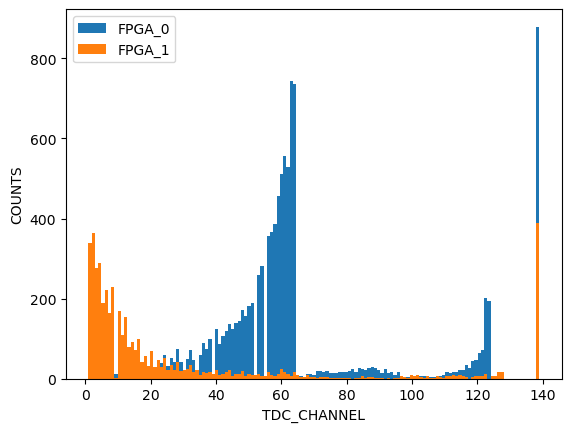

In [26]:
# Task 7: Make two occupancy plots (one for each FPGA).
dataframe_FPGA0=df[df.FPGA==0]
dataframe_FPGA1=df[df.FPGA==1]

plt.hist(dataframe_FPGA0.TDC_CHANNEL,bins=139,label="FPGA_0")
plt.hist(dataframe_FPGA1.TDC_CHANNEL,bins=139,label="FPGA_1")
plt.xlabel('TDC_CHANNEL')
plt.ylabel('COUNTS')
plt.legend()
plt.show()


In [27]:
# Task 8: Use the groupby method to find out the noisy channels.
noise_0=dataframe_FPGA0.groupby(dataframe_FPGA0.TDC_CHANNEL).size().sort_values(ascending=False).head(3)
noise_1=dataframe_FPGA1.groupby(dataframe_FPGA1.TDC_CHANNEL).size().sort_values(ascending=False).head(3)
print('FPGA 0:')
print(noise_0)
print('\nFPGA 1:')
print(noise_1)


FPGA 0:
TDC_CHANNEL
139    879
63     743
64     735
dtype: int64

FPGA 1:
TDC_CHANNEL
139    389
2      363
1      338
dtype: int64


In [28]:
# Task 9: Count the number of unique orbits and unique orbits with at least one measurement from TDC_CHANNEL=139.
unique_orbits = df['ORBIT_CNT'].nunique()
unique_orbits_with_channel_139 = df[df['TDC_CHANNEL'] == 139]['ORBIT_CNT'].nunique()

print(f"Number of unique orbits: {unique_orbits}")
print(f"Number of unique orbits with at least one measurement from TDC_CHANNEL=139: {unique_orbits_with_channel_139}")

Number of unique orbits: 150
Number of unique orbits with at least one measurement from TDC_CHANNEL=139: 150
